Data Science **CodeClause** Project

Stock Analysis Project by **Neeraj Khanduri**

# Stock Market Analysis for Tech Stocks

In this project, we'll analyse data from the stock market for some technology stocks. { Apple, Microsoft, Google, Amazon}

We'll use Pandas to extract and analyse the information, visualise it, and look at different ways to analyse the risk of a stock, based on its performance history. 


In [ ]:
#imports for data analysis
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

#imports for Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

#To grab stock data
from pandas_datareader import DataReader
from datetime import datetime

We're going to analyse some tech stocks, and it seems like a good idea to look at their performance over the last year. We create a list with the stock names, for future looping.

In [ ]:
#We're going to analyse stock info for Apple, Google, Microsoft, and Amazon
tech_list = ['AAPL','GOOGL','MSFT','AMZN']

In [ ]:
#Setting the end date to today
end = datetime.now()

#Start date set to 1 year back
start = datetime(end.year-1,end.month,end.day) 

In [ ]:
#Using Yahoo Finance to grab the stock data
for stock in tech_list:
    globals()[stock] = DataReader(stock,'yahoo',start,end) #The globals method sets the stock name to a global variable

Thanks to the **globals** method, Apple's stock data will be stored in the AAPL global variable dataframe. Let's see if that worked.

In [ ]:
AAPL.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-11-26,160.449997,156.360001,159.570007,156.809998,76959800.0,155.905151
2021-11-29,161.190002,158.789993,159.369995,160.240005,88748200.0,159.315384
2021-11-30,165.520004,159.919998,159.990005,165.300003,174048100.0,164.346176
2021-12-01,170.300003,164.529999,167.479996,164.770004,152052500.0,163.819244
2021-12-02,164.199997,157.800003,158.740005,163.759995,136739200.0,162.815048


In [ ]:
#Basic stats for Apple's Stock
AAPL.describe()

,High,Low,Open,Close,Volume,Adj Close
count,252.000000,252.000000,252.000000,252.000000,2.520000e+02,252.000000
mean,160.124048,155.881151,157.934722,158.076508,9.091149e+07,157.526692
std,12.687927,12.900898,12.867170,12.797224,2.620716e+07,12.588382
min,132.389999,129.039993,130.070007,130.059998,3.519590e+07,129.664490
25%,149.747501,145.177502,147.162502,147.997498,7.340735e+07,147.885014
50%,160.855003,155.889999,159.114998,157.960007,8.638125e+07,157.473511
75%,171.057503,167.220001,169.232502,168.970005,1.024875e+08,168.350849
max,182.940002,179.119995,182.630005,182.009995,1.954327e+08,180.959732


And that easily, we can make out what the stock's minimum, maximum, and average price was for the last year. 

In [ ]:
#Some basic info about the dataframe
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2021-11-26 to 2022-11-25
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       252 non-null    float64
 1   Low        252 non-null    float64
 2   Open       252 non-null    float64
 3   Close      252 non-null    float64
 4   Volume     252 non-null    float64
 5   Adj Close  252 non-null    float64
dtypes: float64(6)
memory usage: 13.8 KB


No missing info in the dataframe above, so we can proceed further.

### What's the change in stock's price over time?

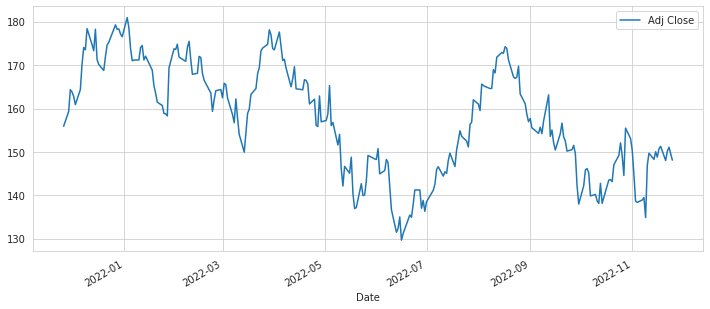

In [ ]:
#Plotting the stock's adjusted closing price using pandas
AAPL['Adj Close'].plot(legend=True,figsize=(12,5))

Similarily, we can plot change in a stock's volume being traded, over time.

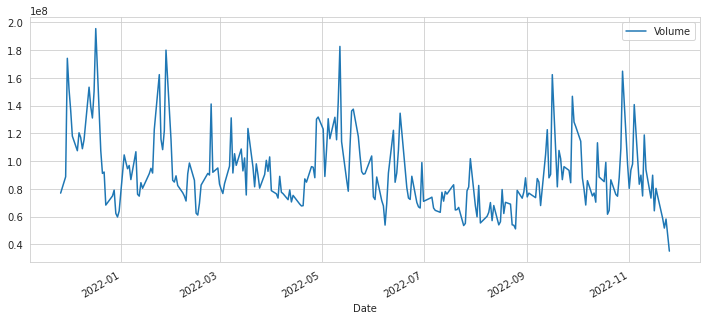

In [ ]:
#Plotting the total volume being traded over time
AAPL['Volume'].plot(legend=True,figsize=(12,5))

### What was the moving average of various stocks?

Let's check out the moving average for stocks over a 10, 20 and 50 day period of time. We'll add that information to the stock's dataframe.

In [ ]:
ma_day = [10,20,50] #moving average day 10, 20 & 50

for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    
    AAPL[column_name] = AAPL['Adj Close'].rolling(window=ma,center=False).mean()

In [ ]:
#print last 5 rows of the table
AAPL.tail()

,High,Low,Open,Close,Volume,Adj Close,MA for 10 days,MA for 20 days,MA for 50 days
Date,,,,,,,,,
2022-11-18,152.699997,149.970001,152.309998,151.289993,74794600.0,151.289993,145.897997,146.736073,146.892719
2022-11-21,150.369995,147.720001,150.160004,148.009995,58724100.0,148.009995,146.806996,146.676449,146.589732
2022-11-22,150.419998,146.929993,148.130005,150.179993,51804100.0,150.179993,147.874995,146.581063,146.521628
2022-11-23,151.830002,149.339996,149.449997,151.070007,58301400.0,151.070007,149.494997,146.679430,146.441972
2022-11-25,148.880005,147.119995,148.309998,148.110001,35195900.0,148.110001,149.618997,146.856921,146.361819


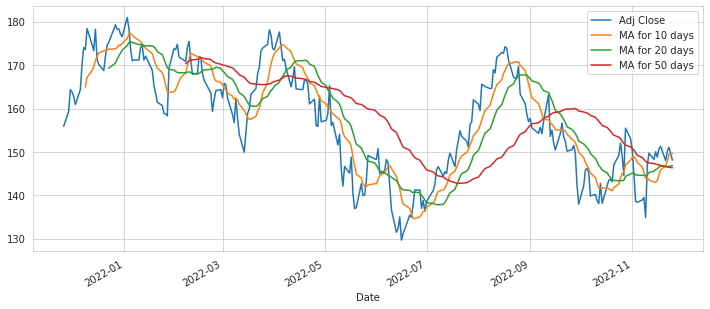

In [ ]:
AAPL[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(12,5))

### What was the daily return average of a stock?

In [ ]:
#The daily return column can be created by using the percentage change over the adjusted closing price
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()

In [ ]:
AAPL['Daily Return'].tail()

Date
2022-11-18    0.003782
2022-11-21   -0.021680
2022-11-22    0.014661
2022-11-23    0.005926
2022-11-25   -0.019594
Name: Daily Return, dtype: float64

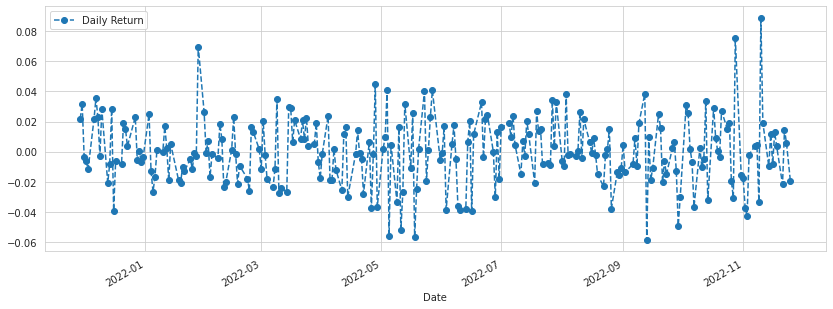

In [ ]:
#Plotting the daily return
AAPL['Daily Return'].plot(figsize=(14,5),legend=True,linestyle='--',marker='o')

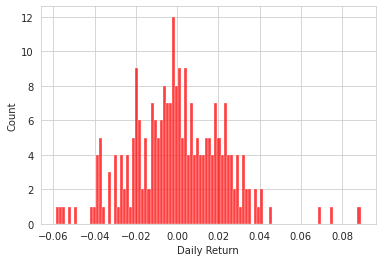

In [ ]:
sns.histplot(x=AAPL['Daily Return'].dropna(),bins=100,color='red')

Positive daily returns seem to be very slightly more frequent than Negative returns for Apple.

### What was the correlation between daily returns of different stocks?

In [ ]:
#Reading just the 'Adj Close' column this time
close_df = DataReader(tech_list,'yahoo',start,end)['Adj Close']

In [ ]:
close_df.tail()

Symbols,AAPL,GOOGL,MSFT,AMZN
Date,,,,
2022-11-18,151.289993,97.430000,241.220001,94.139999
2022-11-21,148.009995,95.599998,242.050003,92.459999
2022-11-22,150.179993,97.050003,245.029999,93.199997
2022-11-23,151.070007,98.459999,247.580002,94.129997
2022-11-25,148.110001,97.459999,247.490005,93.410004


Everything works as expected. 

Just as we did earlier, we can use Pandas' pct_change method to get the daily returns of our stocks.

In [ ]:
rets_df = close_df.pct_change()

In [ ]:
rets_df.tail()

Symbols,AAPL,GOOGL,MSFT,AMZN
Date,,,,
2022-11-18,0.003782,-0.009455,-0.001903,-0.007485
2022-11-21,-0.021680,-0.018783,0.003441,-0.017846
2022-11-22,0.014661,0.015167,0.012311,0.008003
2022-11-23,0.005926,0.014529,0.010407,0.009979
2022-11-25,-0.019594,-0.010156,-0.000364,-0.007649


Let's try creating a scatterplot to visualise any correlations between different stocks. First we'll visualise a scatterplot for the relationship between the daily return of a stock to itself.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


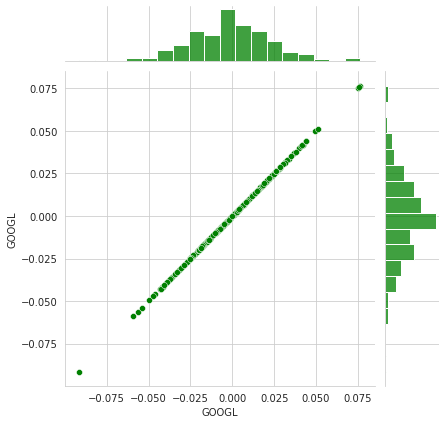

In [ ]:
sns.jointplot('GOOGL','GOOGL',rets_df,kind='scatter',color='green')

As expected, the relationship is perfectly linear because we're trying to correlate something with itself. Now, let's check out the relationship between Google and Apple's daily returns.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


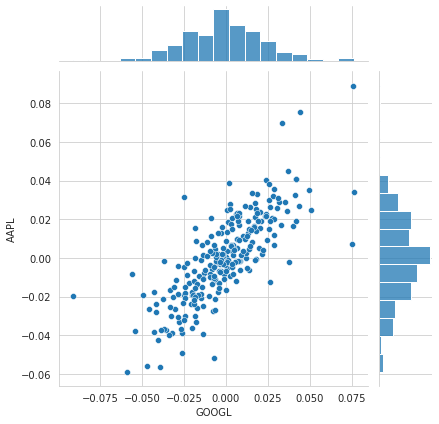

In [ ]:
sns.jointplot('GOOGL','AAPL',rets_df,kind='scatter')

There seems to be a minor correlation between the two stocks, looking at the figure above. 

Lets check about other combinations of stocks?

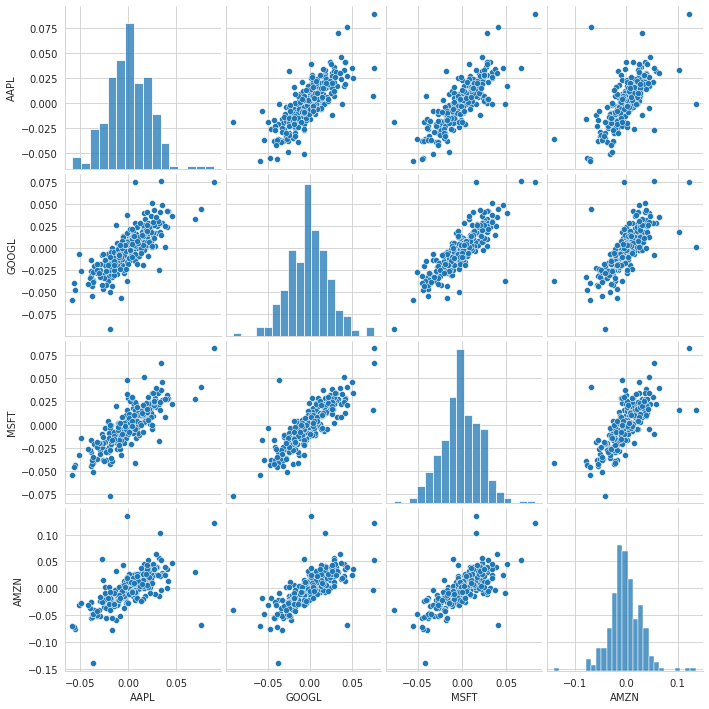

In [ ]:
sns.pairplot(rets_df.dropna())

Quick and dirty overarching visualisation of the scatterplots and histograms of daily returns of our stocks. To see the actual numbers for the correlation coefficients, we can use seaborn's corrplot method.

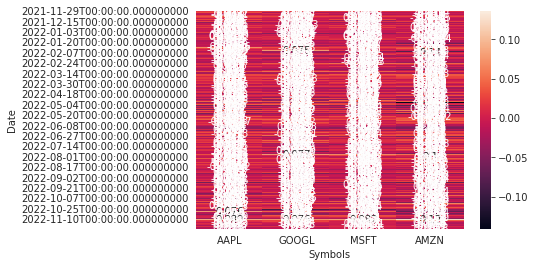

In [ ]:
sns.heatmap(rets_df.dropna(),annot=True)

Google and Microsoft seem to have the highest correlation. But another interesting thing to note is that all tech companies that we explored are positively correlated.

### How much value do we put at risk by investing in a particular stock?

A basic way to quantify risk is to compare the expected return (which can be the mean of the stock's daily returns) with the standard deviation of the daily returns. 

In [ ]:
rets = rets_df.dropna()

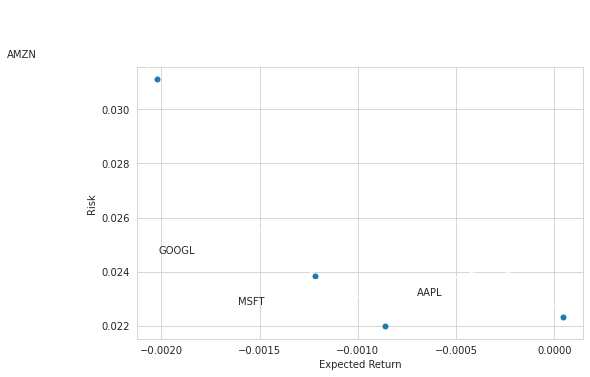

In [ ]:
plt.figure(figsize=(8,5))

plt.scatter(rets.mean(),rets.std(),s=25)

plt.xlabel('Expected Return')
plt.ylabel('Risk')


#For adding annotations in the scatterplot
for label,x,y in zip(rets.columns,rets.mean(),rets.std()):
    plt.annotate(
    label,
    xy=(x,y),xytext=(-120,20),
    textcoords = 'offset points', ha = 'right', va = 'bottom',
    arrowprops = dict(arrowstyle='->',connectionstyle = 'arc3,rad=-0.5'))
    


Everyone would want a stock to have a high expected return and a low risk; Apple and Microsoft seem to be the safe options for that. Meanwhile, Amazon has the highest risk and google has 

### Value at Risk

We can treat _Value at risk_ as the amount of money we could expect to lose for a given confidence interval. We'll use the 'Bootstrap' method to extract this value.

__Bootstrap Method__

Using this method, we calculate the empirical quantiles from a histogram of daily returns. The quantiles help us define our confidence interval.

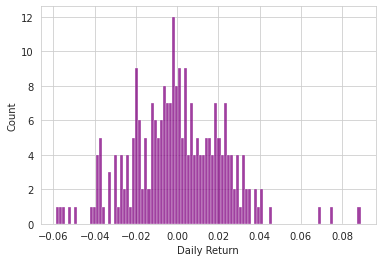

In [ ]:
sns.histplot(x=AAPL['Daily Return'].dropna(),bins=100,color='purple')

To recap, our histogram for Apple's stock looked like the above. And our daily returns dataframe looked like:

In [ ]:
rets.head()

Symbols,AAPL,GOOGL,MSFT,AMZN
Date,,,,
2021-11-29,0.021874,0.023544,0.021081,0.016267
2021-11-30,0.031578,-0.024964,-0.017943,-0.015302
2021-12-01,-0.003206,-0.005962,-0.001543,-0.018063
2021-12-02,-0.006130,0.013573,-0.001787,-0.001847
2021-12-03,-0.011724,-0.006746,-0.019667,-0.013839


In [ ]:
#Using Pandas built in qualtile method
rets['AAPL'].quantile(0.05)

-0.03731651824364818

**According to the analysis, AAPL is the best stokck to invest.**

**Thankyou**